# Evaluate classification results per cancer type, Figure2

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import sys,os
from collections import defaultdict, Counter
from matplotlib import patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
print(sys.version)

3.8.6 (default, Dec 18 2020, 08:42:53) 
[Clang 11.0.0 ]


In [3]:
%pip list | grep -e "numpy" -e "pandas" -e "matplotlib" -e "scipy" -e "seaborn"

matplotlib                        3.3.4
matplotlib-venn                   0.11.6
numpy                             1.20.2
pandas                            1.2.4
scipy                             1.6.0
seaborn                           0.11.1
You should consider upgrading via the '/Users/takamatsushiro/.pyenv/versions/3.8.6/envs/default/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=4,3
plt.rcParams['figure.dpi']=300
plt.rcParams['axes.linewidth'] =0.5
plt.rcParams['lines.linewidth'] =0.5
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set font size
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  

In [5]:
store="../results/"

In [6]:
# import data
df=pd.read_csv("../data/TCGA_integrated_data_after_clustering.tsv"
               ,sep="\t",index_col=0)

In [399]:
cluster_colors=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y']
dict_cluster_colors={"SMK":'red', "UVL":'blue', "APB":'green', "POL":'brown', "MRD":'purple',\
                     "HRD":'hotpink',"GNS":"c","AGE":"y",np.nan:"grey","UND":"grey"}
cluster_orders=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE"]
dict_cluster_order_number={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8}

cluster_colors2=['red', 'blue', 'green', "brown", 'purple', 'hotpink',"c",'y',"grey"]
cluster_orders2=["SMK","UVL","APB","POL","MRD","HRD","GNS","AGE","UND"]
dict_cluster_order_number2={ "SMK":0,"UVL":1,"APB":2,"POL":3,"MRD":4,"HRD":5,"GNS":6,"AGE":7,np.nan:8,"UND":8}

# Compare subtype ratio per cancer type

In [53]:
tcga_count=pd.crosstab(df["cluster_m2_names"],df["CancerType"])
tcga_count=tcga_count.reindex(cluster_orders,axis=0).fillna(0)
tcga_ratio=tcga_count.apply(lambda x: x/np.sum(x) )*100
tcga_ratio

CancerType,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM
cluster_m2_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25


In [54]:
# make cancer colors
rgbs1=sns.color_palette("tab20", 20)
rgbs2=sns.color_palette("tab20b", 20)
rgbs1_3=[] 
for i,x in enumerate(rgbs1):
    if (i%4)!=0:
        rgbs1_3.append(x)
rgbs2_3=[] 
for i,x in enumerate(rgbs2):
    if (i%4)!=0:
        rgbs2_3.append(x)

cancer30_colors = sns.color_palette(rgbs1_3+rgbs2_3, 30)

In [55]:
cancers_freq_order=[x[0] for x in Counter( df["CancerType"]).most_common()]

In [56]:
dict_cancer_colors={ cancer:color for cancer,color in zip(cancers_freq_order,cancer30_colors)}
dict_cancer_colors["Others"]="whitesmoke"
dict_cancer_colors[""]="whitesmoke"

In [793]:
dict_cancer_colors

{'BRCA': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CRC': (1.0, 0.4980392156862745, 0.054901960784313725),
 'UCEC': (1.0, 0.7333333333333333, 0.47058823529411764),
 'LUAD': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'HNSC': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'LGG': (1.0, 0.596078431372549, 0.5882352941176471),
 'PRAD': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'LUSC': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'THCA': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'SKCM': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 'STAD': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'OV': (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 'BLCA': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 'GBM': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'LIHC': (0.6196078431372549, 0.8549019607843137, 0.

In [57]:
bwr=LinearSegmentedColormap.from_list('bwr', [(0,"blue"),(0.5,"w"),(1,"red")] )
wk=LinearSegmentedColormap.from_list('wk', [(0,"w"),(1,"k")] )
wr=LinearSegmentedColormap.from_list('wr', [(0,"w"),(1,"red")] )

In [58]:
nbdc=pd.read_csv("../data/NBDC_tgs.tsv",sep="\t",index_col=0)
nbdc.head()

,KNN,SVC,RF,LR,TGS,Details,irGS,CancerType
UCEC12,APB,APB,APB,APB,APB,APB:4,1,UCEC
UCEC05,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC10,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC13,POL,POL,POL,POL,POL,POL:4,1,UCEC
UCEC26,POL,POL,POL,POL,POL,POL:4,1,UCEC


In [59]:
Counter(nbdc["CancerType"])

Counter({'UCEC': 69,
         'BRCA': 64,
         'CRC': 83,
         'HSOC': 62,
         'LUAD': 43,
         'STAD': 56,
         'TNBC': 36})

In [121]:
nbdc_count=pd.crosstab( nbdc["TGS"], nbdc["CancerType"])
nbdc_count.drop("UND",inplace=True)
nbdc_count=nbdc_count.reindex(cluster_orders,axis=0).fillna(0)
nbdc_count=nbdc_count.drop("TNBC",axis=1)
nbdc_count.rename(columns={"HSOC":"OV"},inplace=True)
nbdc_ratio=nbdc_count.apply(lambda x: x/np.sum(x) )*100
nbdc_ratio

CancerType,BRCA,CRC,OV,LUAD,STAD,UCEC
TGS,,,,,,
SMK,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000
UVL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
APB,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588
POL,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471
MRD,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824
HRD,29.032258,18.292683,90.163934,19.512195,28.301887,4.411765
GNS,3.225806,0.000000,1.639344,9.756098,0.000000,1.470588
AGE,48.387097,78.048780,6.557377,19.512195,43.396226,54.411765


In [602]:
total_ratio=tcga_ratio.copy()

add=nbdc_ratio.copy()
add.columns=[x+"_NBDC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,STAD_NBDC,UCEC_NBDC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,28.301887,4.411765
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,0.000000,1.470588
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,43.396226,54.411765


In [724]:
cptac=pd.read_csv("../data/CPTAC_integrated.tsv",sep="\t")

In [725]:
Counter(cptac["CancerType2"])

Counter({'PAAD': 132,
         'KRC': 109,
         'HNC': 108,
         'UCEC': 100,
         'LUAD': 109,
         'LUSC': 108,
         'BRN': 99,
         'CRC': 105,
         'BRCA': 126,
         'HSOC': 95})

In [605]:
cptac_count=pd.crosstab(cptac["TGS"],cptac["CancerType2"])
cptac_count=cptac_count.reindex(cluster_orders,axis=0).fillna(0)
cptac_count.rename(columns={"HSOC":"OV"},inplace=True)
cptac_ratio=cptac_count.apply(lambda x: x/np.sum(x) )*100
cptac_ratio

CancerType2,BRCA,BRN,CRC,HNC,OV,KRC,LUAD,LUSC,PAAD,UCEC
TGS,,,,,,,,,,
SMK,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [606]:
add=cptac_ratio.copy()
add.columns=[x+"_CPTAC" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,STAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,28.301887,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,0.000000,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,43.396226,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449


In [607]:
keynotes=pd.read_csv("../data/KEYNOTEs_all_tgs.tsv",sep="\t")

In [608]:
keynotes_s=pd.read_csv("../data/KEYNOTEs_HNSC_SKCM_tgs.tsv",sep="\t")

In [609]:
keynotes_count=pd.crosstab(keynotes_s["TGS"],keynotes_s["CancerType"])
keynotes_count=keynotes_count.reindex(cluster_orders,axis=0).fillna(0)
keynotes_ratio=keynotes_count.apply(lambda x: x/np.sum(x) )*100
keynotes_ratio

CancerType,HNSC,SKCM
TGS,,
SMK,13.0,0.000000
UVL,2.0,83.720930
APB,35.0,0.000000
POL,0.0,0.000000
MRD,0.0,0.000000
HRD,14.0,11.627907
GNS,0.0,0.000000
AGE,36.0,4.651163


In [610]:
add=keynotes_ratio.copy()
add.columns=[x+"_KEYNOTE" for x in add.columns]
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,STAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,28.301887,4.411765,31.967213,7.216495,6.862745,14.285714,73.118280,69.0,10.476190,10.784314,6.923077,5.102041,14.0,11.627907
GNS,18.478261,0.970874,5.583756,0.692042,13.333333,0.375235,0.543478,0.769231,1.775148,19.696970,15.773810,11.032028,5.325444,2.472527,3.106796,1.422764,20.731707,6.896552,9.039548,59.217877,11.717172,7.594937,4.496788,1.372998,71.09375,51.016260,0.943396,0.000000,43.75,3.225806,0.000000,1.639344,9.756098,0.000000,1.470588,5.737705,1.030928,0.000000,1.020408,0.000000,12.0,5.714286,1.960784,3.846154,2.040816,0.0,0.000000
AGE,45.652174,11.650485,45.177665,15.570934,40.000000,68.855535,57.065217,76.666667,35.305720,69.696970,28.273810,29.893238,84.220907,33.241758,15.728155,3.658537,34.146341,14.022989,79.096045,37.988827,75.151515,40.506329,7.066381,62.242563,21.87500,41.056911,39.622642,57.894737,46.25,48.387097,78.048780,6.557377,19.512195,43.396226,54.411765,45.901639,89.690722,68.627451,33.673469,24.731183,18.0,24.761905,0.980392,86.153846,56.122449,36.0,4.651163


In [611]:
import glob
files=glob.glob("../data/tgs_results/*tgs.tsv")
files=sorted(files)
names=[os.path.basename(x).replace("_tgs.tsv","") for x in files]
names

['blca_bgi',
 'blca_cornell_2016',
 'blca_dfarber_mskcc_2014',
 'brca_broad',
 'brca_sanger',
 'ccrcc_dfci_2019',
 'coadread_dfci_2016',
 'coadread_genentech',
 'hnsc_broad',
 'lgg_ucsf_2014',
 'luad_broad',
 'luad_mskcc_2015',
 'mel_dfci_2019',
 'mel_ucla_2016',
 'mixed_allen_2018_blca',
 'mixed_allen_2018_lung',
 'mixed_allen_2018_mel',
 'nsclc_mskcc_2018',
 'paad_icgc',
 'paad_utsw_2015',
 'skcm_dfci_2015']

In [612]:
all_ratio, all_count=pd.DataFrame(), pd.DataFrame()
for path,name in zip(files,names):
    tmp_df=pd.read_csv(path,sep="\t")
    print(name,len(tmp_df))
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    tmp_df=tmp_df[tmp_df["TGS"]!="UND"]
    count=tmp_df.groupby("TGS").count()[[name]].reindex(index=cluster_orders).fillna(0)
    ratio=count/np.sum(count)*100
    all_ratio=pd.concat( [all_ratio,ratio],axis=1)
    all_count=pd.concat( [all_count,count],axis=1)

blca_bgi 99
blca_cornell_2016 72
blca_dfarber_mskcc_2014 50
brca_broad 103
brca_sanger 100
ccrcc_dfci_2019 35
coadread_dfci_2016 619
coadread_genentech 72
hnsc_broad 74
lgg_ucsf_2014 61
luad_broad 158
luad_mskcc_2015 34
mel_dfci_2019 144
mel_ucla_2016 37
mixed_allen_2018_blca 27
mixed_allen_2018_lung 57
mixed_allen_2018_mel 151
nsclc_mskcc_2018 75
paad_icgc 99
paad_utsw_2015 109
skcm_dfci_2015 110


In [613]:
add=all_ratio.copy()
total_ratio=pd.concat([total_ratio,add],axis=1)
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,STAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,blca_bgi,blca_cornell_2016,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,hnsc_broad,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_blca,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,skcm_dfci_2015
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,2.173913,8.571429,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,11.111111,0.000000,64.516129,58.064516,0.000000,0.000000,0.0,49.056604,0.689655,58.666667,0.000000,0.000000,0.925926
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.0,0.000000,77.241379,1.333333,0.000000,0.000000,63.888889
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,46.739130,68.571429,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,22.222222,0.000000,2.580645,3.225806,0.000000,0.000000,88.0,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.974026,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000,0.000000,1.428571,0.000000,0.000000,0.0,0.000000,18.668831,20.833333,0.000000,1.785714,0.645161,0.000000,0.719424,0.000000,0.0,0.000000,0.689655,2.666667,0.000000,0.000000,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.03125,5.284553,16.226415,33.333333,10.00,29.032258,18.292683,90.163934,19.512195,28.301887,4.411765,31.96

In [614]:
cancertype="LUNG"
dfs=[ tcga_count[["LUSC","LUAD"]],
     cptac_count[["LUSC","LUAD"]],
     nbdc_count["LUAD"],
     all_count[['luad_broad',"nsclc_mskcc_2018",
                   'mixed_allen_2018_lung',"luad_mskcc_2015"]]]
names=["TCGA LUSC","TCGA LUAD","CPTAC LUSC","CPTAC LUAD","NBDC LUAD",
       'luad_broad',"nsclc_mskcc_2018", 'mixed_allen_2018_lung',"luad_mskcc_2015"]

TCGA LUSC [n=492]
TCGA LUAD [n=515]
CPTAC LUSC [n=102]
CPTAC LUAD [n=105]
NBDC LUAD [n=41]
luad_broad [n=155]
nsclc_mskcc_2018 [n=75]
mixed_allen_2018_lung [n=53]
luad_mskcc_2015 [n=31]


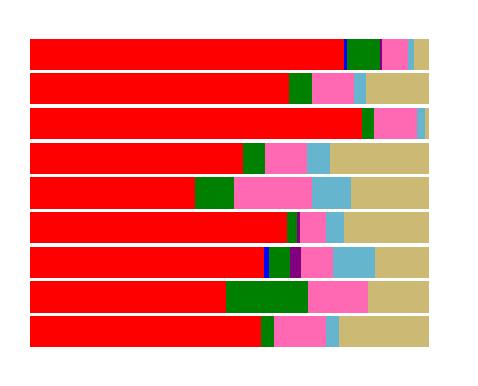

In [615]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()
#plt.savefig(store+"Subtype_frequency_comp_"+cancertype+".png",dpi=300,bbox_inches="tight")

In [616]:
cancertype="SKCM"
dfs=[ tcga_count[cancertype], 
     keynotes_count[cancertype],
     all_count["mixed_allen_2018_mel"],
     all_count["mel_dfci_2019"],
     all_count['skcm_dfci_2015'],
     all_count['mel_ucla_2016']]
names=["TCGA","KEYNOTE",
       'mixed_allen_2018_mel',"mel_dfci_2019",'skcm_dfci_2015','mel_ucla_2016']

TCGA [n=467]
KEYNOTE [n=86]
mixed_allen_2018_mel [n=145]
mel_dfci_2019 [n=139]
skcm_dfci_2015 [n=108]
mel_ucla_2016 [n=37]


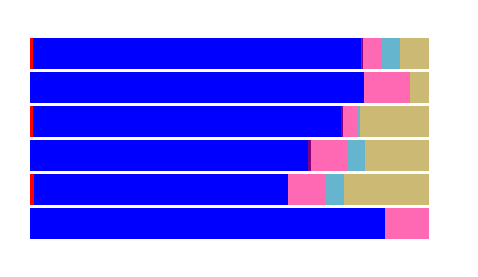

In [617]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

In [618]:
cancertype="BLCA"
dfs=[ tcga_count[cancertype],
     all_count[[
         "blca_bgi", 'blca_cornell_2016',
 'blca_dfarber_mskcc_2014','mixed_allen_2018_blca']] ] 
names=["TCGA",
       "blca_bgi",'blca_cornell_2016', 'blca_dfarber_mskcc_2014'
        ,'mixed_allen_2018_blca']

TCGA [n=412]
blca_bgi [n=92]
blca_cornell_2016 [n=70]
blca_dfarber_mskcc_2014 [n=49]
mixed_allen_2018_blca [n=25]


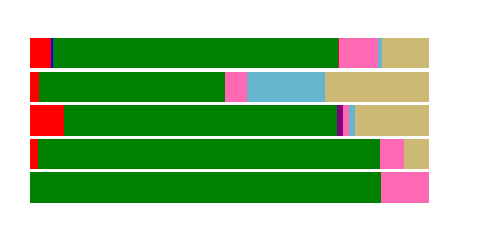

In [619]:
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=985]
CPTAC [n=122]
NBDC [n=62]
brca_sanger [n=100]
brca_broad [n=98]


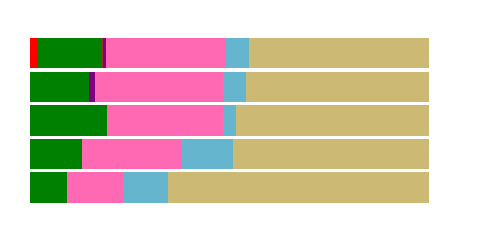

In [620]:
cancertype="BRCA"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[['brca_sanger','brca_broad']] ]
names=["TCGA","CPTAC","NBDC",  'brca_sanger','brca_broad']

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=533]
CPTAC [n=102]
NBDC [n=82]
coadread_dfci_2016 [n=616]
coadread_genentech [n=72]


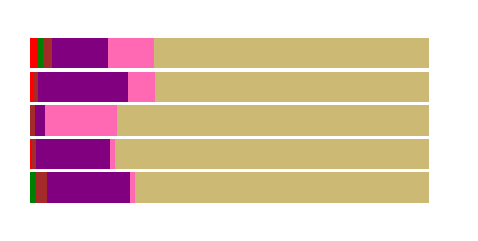

In [621]:
cancertype="CRC"
dfs=[tcga_count[cancertype],
     cptac_count[cancertype],
     nbdc_count[cancertype],
     all_count[["coadread_dfci_2016",'coadread_genentech',]] ]
names=["TCGA","CPTAC","NBDC",
       "coadread_dfci_2016",'coadread_genentech',]

input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

HNSC
TCGA [n=507]
CPTAC [n=98]
KEYNOTE [n=100]
hnsc_broad [n=72]


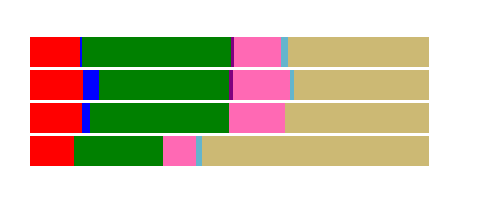

In [622]:
cancertype="HNSC"
dfs=[ tcga_count[cancertype], cptac_count["HNC"],keynotes_count[cancertype],
     all_count['hnsc_broad']]
names=["TCGA","CPTAC", 'KEYNOTE','hnsc_broad']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

RCC
TCGA KIRC [n=336]
TCGA KIRP [n=281]
CPTAC KRC [n=100]
ccrcc_dfci_2019 [n=31]


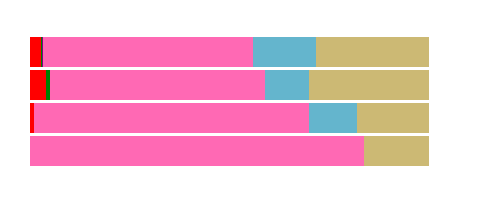

In [623]:
cancertype="RCC"
dfs=[ tcga_count["KIRC"], tcga_count["KIRP"], cptac_count["KRC"], 
     all_count['ccrcc_dfci_2019' ]]
names=["TCGA KIRC","TCGA KIRP","CPTAC KRC",     
       'ccrcc_dfci_2019',]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

BRN
TCGA GBM [n=390]
TCGA LGG [n=507]
CPTAC BRN [n=97]
lgg_ucsf_2014 [n=56]


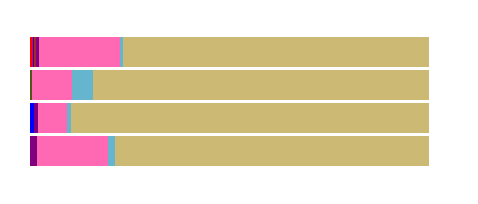

In [624]:
cancertype="BRN"
dfs=[ tcga_count[["GBM","LGG"]], cptac_count["BRN"],all_count[[ 'lgg_ucsf_2014',]]]
names=["TCGA GBM","TCGA LGG",  "CPTAC BRN", 'lgg_ucsf_2014']

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

PAAD
TCGA [n=177]
CPTAC [n=130]
paad_utsw_2015 [n=106]
paad_icgc [n=97]


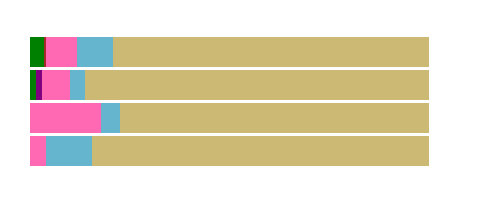

In [625]:
cancertype="PAAD"
dfs=[ tcga_count["PAAD"] , cptac_count["PAAD"] ,all_count[['paad_utsw_2015','paad_icgc',]]]
names=["TCGA","CPTAC",'paad_utsw_2015',  'paad_icgc', ]

print(cancertype)
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

OV
TCGA [n=435]
CPTAC [n=93]
NBDC [n=61]


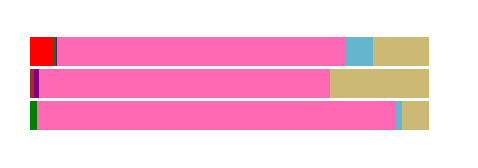

In [626]:
cancertype="OV"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype]]
names=["TCGA","CPTAC",  "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
print(cancertype)
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

TCGA [n=530]
CPTAC [n=98]
NBDC [n=68]


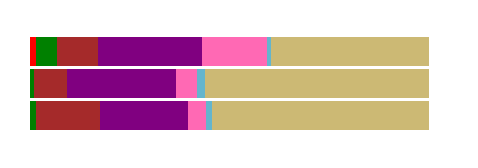

In [627]:
cancertype="UCEC"
dfs=[ tcga_count[cancertype], cptac_count[cancertype],nbdc_count[cancertype]]
names=["TCGA","CPTAC", "NBDC"]
input_df=pd.concat(dfs,axis=1)
input_df.columns=names
for name,val in zip( names,  np.sum(input_df) ):
    print(name, "[n=%.1d]" %val )
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(1.8,0.16*n))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

# Clustering

In [628]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,cophenet,distance,set_link_color_palette

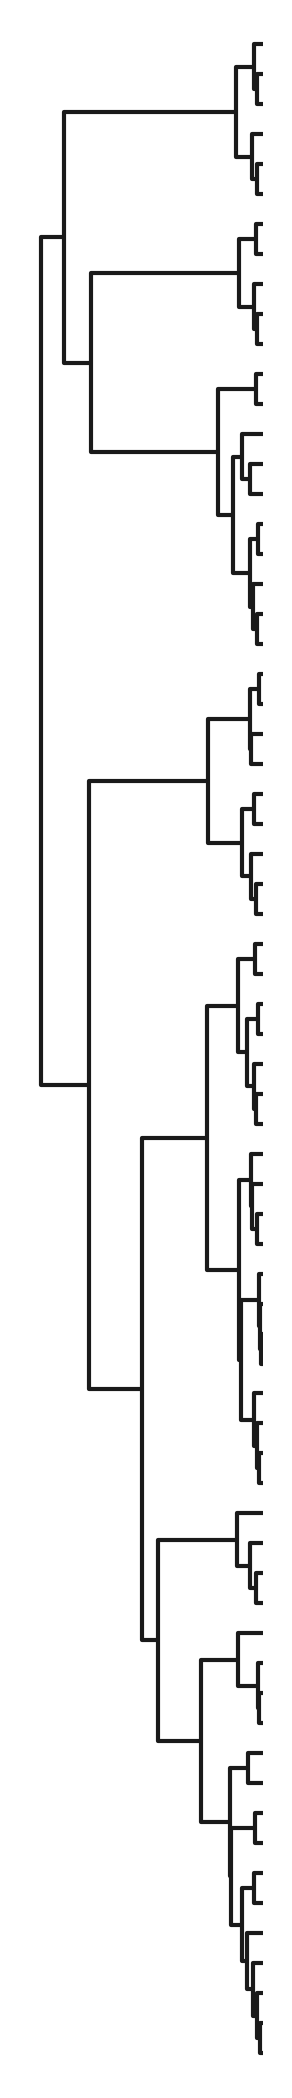

In [629]:
# dendrogram
input_df=total_ratio.T
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.45 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
#cluster_colors=['red', 'blue', 'green', 'brown', 'purple','hotpink',"c","y"]
# plot dendrogram
set_link_color_palette(["k"])
fig=plt.figure( figsize=(1,9),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,orientation="left",labels=input_df.index,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
ax.invert_yaxis()

In [630]:
col_order=d["ivl"]

SKCM
SKCM_KEYNOTE
mel_ucla_2016
mixed_allen_2018_mel
mel_dfci_2019
skcm_dfci_2015
blca_dfarber_mskcc_2014
mixed_allen_2018_blca
blca_cornell_2016
BLCA
CESC
LUSC
LUSC_CPTAC
LIHC
LUAD_NBDC
mixed_allen_2018_lung
LUAD_CPTAC
luad_mskcc_2015
nsclc_mskcc_2018
LUAD
luad_broad
KIRC
KIRP
MESO
SARC
OV_NBDC
ccrcc_dfci_2019
OV_CPTAC
OV
KRC_CPTAC
UCEC_NBDC
UCEC_CPTAC
coadread_dfci_2016
coadread_genentech
CRC_CPTAC
CRC
STAD
brca_broad
KICH
PAAD
PRAD
paad_utsw_2015
GBM
CRC_NBDC
lgg_ucsf_2014
paad_icgc
BRN_CPTAC
LGG
PAAD_CPTAC
TGCT
UVM
PCPG
THCA
blca_bgi
HNSC
HNC_CPTAC
HNSC_KEYNOTE
UCEC
STAD_NBDC
ESCA
hnsc_broad
ACC
CHOL
UCS
brca_sanger
BRCA_NBDC
BRCA
BRCA_CPTAC


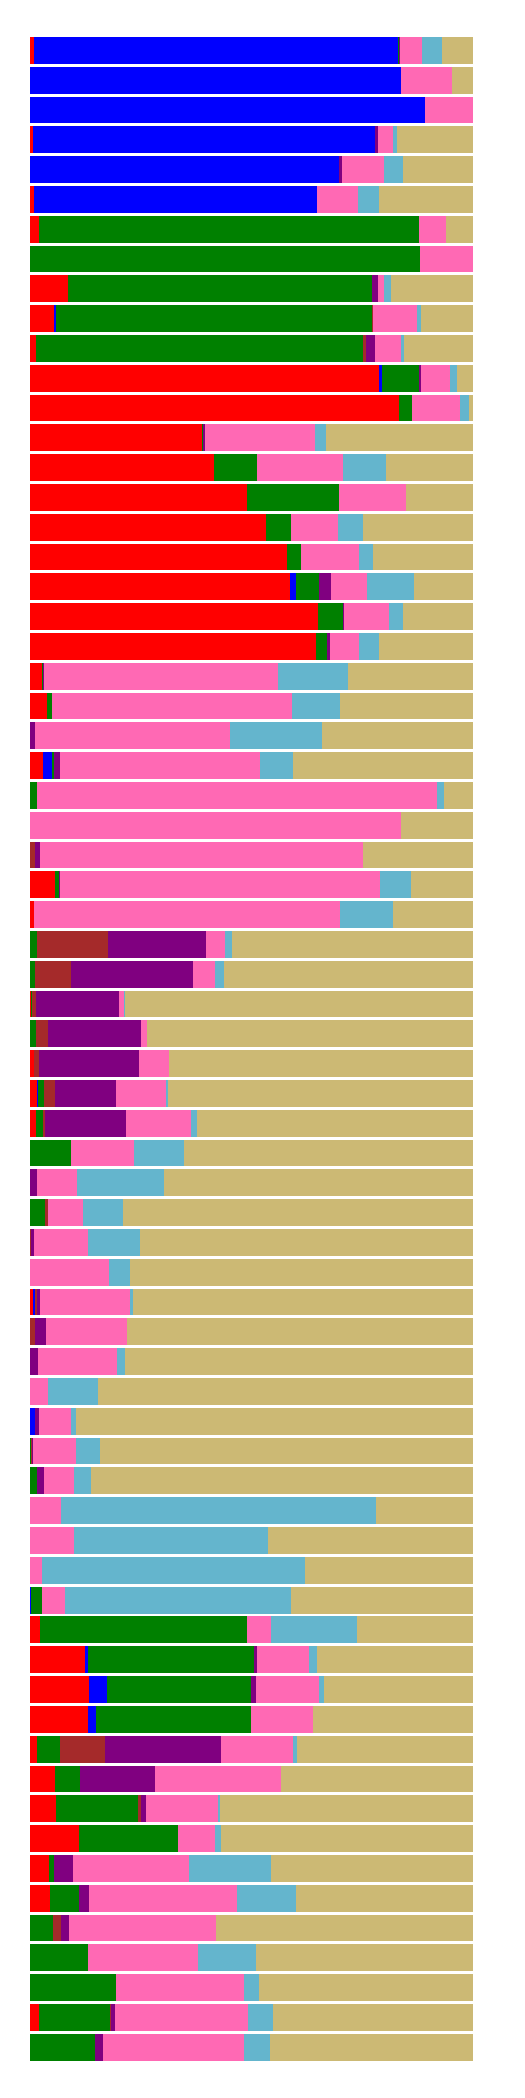

In [631]:
input_df=total_ratio.loc[:,col_order]
for i in input_df.columns:
    print(i)
input_df=input_df.apply(lambda x: x/np.sum(x) )*100
n=input_df.shape[1]
fig=plt.figure(figsize=(2,9))
ax=fig.add_subplot(111)
input_df.T.plot.barh(stacked=True,color=cluster_colors,ax=ax,width=0.9,lw=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize=6)
ax.legend([])
ax.invert_yaxis()
ax.set_axis_off()

In [632]:
col1=pd.DataFrame({"tumor":col_order})
col2=pd.DataFrame({"color":col_order})
col2=col2.replace({'SKCM':1,
 'SKCM_KEYNOTE':1,
 'mel_ucla_2016':1,
 'mixed_allen_2018_mel':1,
 'mel_dfci_2019':1,
 'skcm_dfci_2015':1,
 'blca_dfarber_mskcc_2014':2,
 'mixed_allen_2018_blca':2,
 'blca_cornell_2016':2,
 'BLCA':2,
 'CESC':0,
 'LUSC':3,
 'LUSC_CPTAC':3,
 'LIHC':3,
 'LUAD_NBDC':3,
 'mixed_allen_2018_lung':3,
 'LUAD_CPTAC':3,
 'luad_mskcc_2015':3,
 'nsclc_mskcc_2018':3,
 'LUAD':3,
 'luad_broad':3,
 'KIRC':4,
 'KIRP':4,
 'MESO':0,
 'SARC':0,
 'OV_NBDC':0,
 'ccrcc_dfci_2019':4,
 'OV_CPTAC':0,
 'OV':0,
 'KRC_CPTAC':4,
 'UCEC_NBDC':0,
 'UCEC_CPTAC':0,
 'coadread_dfci_2016':7,
 'coadread_genentech':7,
 'CRC_CPTAC':7,
 'CRC':7,
 'STAD':0,
 'brca_broad':8,
 'hnsc_mdanderson_2013':9,
 'paad_utsw_2015':6,
 'GBM':5,
 'CRC_NBDC':7,
 'lgg_ucsf_2014':5,
 'KICH':0,
 'PAAD':6,
 'PRAD':0,
 'paad_icgc':6,
 'BRN_CPTAC':5,
 'LGG':5,
 'PAAD_CPTAC':6,
 'TGCT':0,
 'UVM':0,
 'hnsc_jhu':9,
 'PCPG':0,
 'THCA':0,
 'blca_bgi':2,
 'HNSC':9,
 'HNC_CPTAC':9,
 'HNSC_KEYNOTE':9,
 'UCEC':0,
 'STAD_NBDC':0,
 'ESCA':0,
 'hnsc_broad':9,
 'ACC':0,
 'CHOL':0,
 'UCS':0,
 'brca_sanger':8,
 'BRCA_NBDC':8,
 'BRCA':8,
 'BRCA_CPTAC':8})
col=pd.concat([col1,col2],axis=1)

In [633]:
col3=pd.DataFrame({"color2":col_order})
col3=col3.replace({'SKCM':1,
 'SKCM_KEYNOTE':1,
 'mel_ucla_2016':1,
 'mixed_allen_2018_mel':1,
 'mel_dfci_2019':1,
 'skcm_dfci_2015':1,
 'blca_dfarber_mskcc_2014':2,
 'mixed_allen_2018_blca':2,
 'blca_cornell_2016':2,
 'BLCA':2,
 'CESC':0,
 'LUSC':3,
 'LUSC_CPTAC':3,
 'LIHC':0,
 'LUAD_NBDC':3,
 'mixed_allen_2018_lung':3,
 'LUAD_CPTAC':3,
 'luad_mskcc_2015':3,
 'nsclc_mskcc_2018':3,
 'LUAD':3,
 'luad_broad':3,
 'KIRC':0,
 'KIRP':0,
 'MESO':0,
 'SARC':0,
 'OV_NBDC':0,
 'ccrcc_dfci_2019':0,
 'OV_CPTAC':0,
 'OV':0,
 'KRC_CPTAC':0,
 'UCEC_NBDC':0,
 'UCEC_CPTAC':0,
 'coadread_dfci_2016':4,
 'coadread_genentech':4,
 'CRC_CPTAC':4,
 'CRC':4,
 'STAD':0,
 'brca_broad':5,
 'hnsc_mdanderson_2013':0,
 'paad_utsw_2015':0,
 'GBM':0,
 'CRC_NBDC':4,
 'lgg_ucsf_2014':0,
 'KICH':0,
 'PAAD':0,
 'PRAD':0,
 'paad_icgc':0,
 'BRN_CPTAC':0,
 'LGG':0,
 'PAAD_CPTAC':0,
 'TGCT':0,
 'UVM':0,
 'hnsc_jhu':0,
 'PCPG':0,
 'THCA':0,
 'blca_bgi':2,
 'HNSC':0,
 'HNC_CPTAC':0,
 'HNSC_KEYNOTE':0,
 'UCEC':0,
 'STAD_NBDC':0,
 'ESCA':0,
 'hnsc_broad':0,
 'ACC':0,
 'CHOL':0,
 'UCS':0,
 'brca_sanger':5,
 'BRCA_NBDC':5,
 'BRCA':5,
 'BRCA_CPTAC':5})
col=pd.concat([col1,col2,col3],axis=1)

In [262]:
# make cancer colors
rgbs1=sns.color_palette("tab10", 10)
cancer_colors_11 = sns.color_palette([(1,1,1)]+rgbs1, 11)
cancer_colors_11

[(1.0, 1.0, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [263]:
# make cancer colors
cancer_colors_6 = sns.color_palette(["w","blue",'green', 'red', 'purple','k',"c","hotpink"],6)

In [264]:
cancer_colors_6

[(1.0, 1.0, 1.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.0, 0.0),
 (0.5019607843137255, 0.0, 0.5019607843137255),
 (0.1, 0.1, 0.1)]

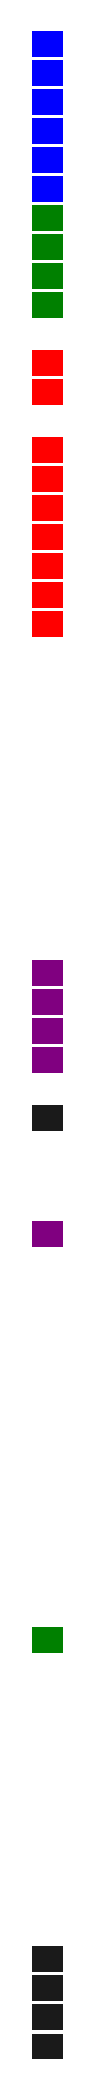

In [265]:
fig=plt.figure(figsize=(0.15,8.97))
ax=fig.add_subplot(111)
ax=sns.heatmap(col[["color2"]],cmap=cancer_colors_6,cbar=False,yticklabels=0,xticklabels=0,linecolor="w",linewidths=0.5)

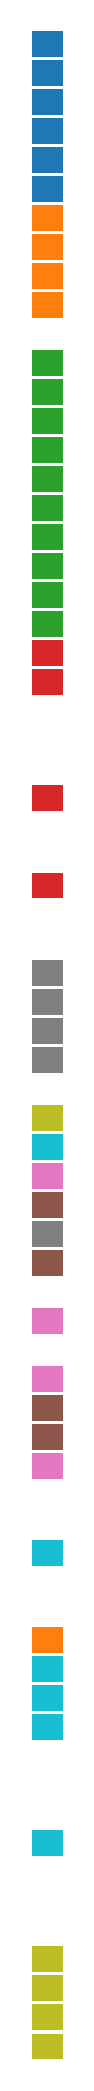

In [266]:
fig=plt.figure(figsize=(0.15,8.97))
ax=fig.add_subplot(111)
ax=sns.heatmap(col[["color"]],cmap=cancer_colors_11,cbar=False,yticklabels=0,xticklabels=0,linecolor="w",linewidths=0.5)

In [267]:
rgbs2[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

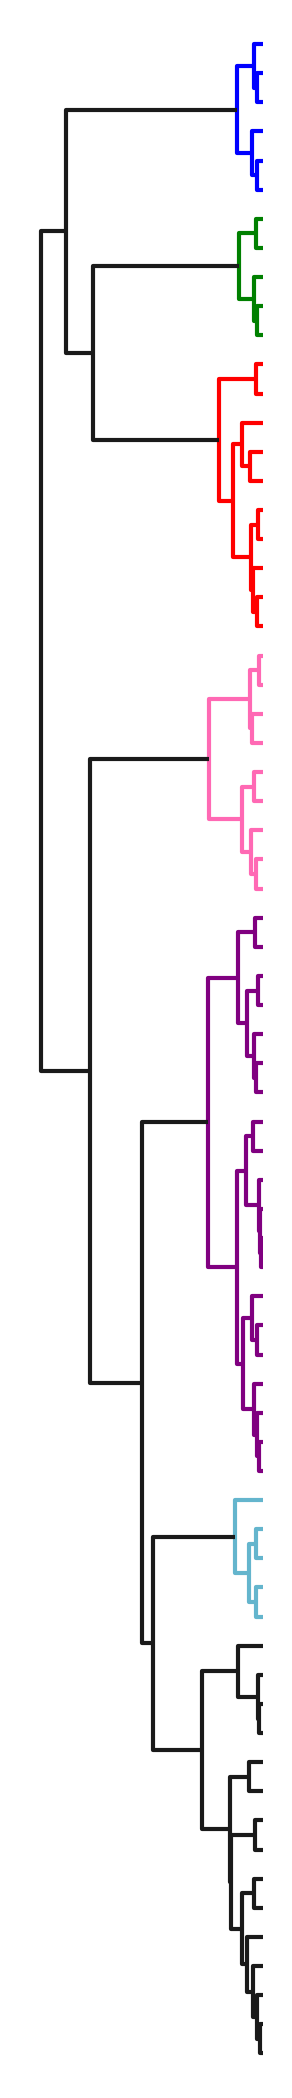

In [238]:
# dendrogram
input_df=total_ratio.T
Z = linkage(input_df, method='ward', metric='euclidean')
threshold = 0.45 * np.max(Z[:, 2])
clusters = fcluster(Z,threshold,criterion="distance")
cluster_colors=["blue",'green', 'red', 'hotpink','purple',"c","k"]
# plot dendrogram
set_link_color_palette(cluster_colors)
fig=plt.figure( figsize=(1,9),facecolor='w')
ax = fig.add_subplot(1,1,1)
# Temporarily override the default line width:
with plt.rc_context({'lines.linewidth': 1}):
    d=dendrogram(Z, color_threshold=threshold,orientation="left",labels=input_df.index,
        count_sort=True  ,above_threshold_color="k",ax=ax  )
ax.set_axis_off()
ax.invert_yaxis()

# UMAP

In [561]:
total_ratio

,ACC,BLCA,BRCA,CESC,CHOL,CRC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,SARC,SKCM,STAD,TGCT,THCA,UCEC,UCS,UVM,BRCA_NBDC,CRC_NBDC,OV_NBDC,LUAD_NBDC,STAD_NBDC,UCEC_NBDC,BRCA_CPTAC,BRN_CPTAC,CRC_CPTAC,HNC_CPTAC,OV_CPTAC,KRC_CPTAC,LUAD_CPTAC,LUSC_CPTAC,PAAD_CPTAC,UCEC_CPTAC,HNSC_KEYNOTE,SKCM_KEYNOTE,blca_bgi,blca_cornell_2016,blca_dfarber_mskcc_2014,brca_broad,brca_sanger,ccrcc_dfci_2019,coadread_dfci_2016,coadread_genentech,hnsc_broad,hnsc_jhu,hnsc_mdanderson_2013,lgg_ucsf_2014,luad_broad,luad_mskcc_2015,mel_dfci_2019,mel_ucla_2016,mixed_allen_2018_blca,mixed_allen_2018_lung,mixed_allen_2018_mel,nsclc_mskcc_2018,paad_icgc,paad_utsw_2015,skcm_dfci_2015
SMK,4.347826,5.339806,2.030457,1.384083,4.444444,1.688555,5.978261,0.769231,12.426036,0.000000,2.678571,3.914591,0.000000,38.736264,65.048544,78.861789,0.000000,5.747126,0.000000,0.000000,0.000000,2.953586,0.856531,1.372998,0.00000,0.000000,1.509434,0.000000,0.00,0.000000,0.000000,0.000000,41.463415,5.660377,0.000000,0.000000,0.000000,0.980392,13.265306,0.000000,1.0,53.333333,83.333333,0.000000,0.000000,13.0,0.000000,2.173913,8.571429,2.040816,0.000000,0.0,0.000000,0.324675,0.000000,11.111111,0.000,0.000000,0.000000,64.516129,58.064516,0.000000,0.000000,0.0,49.056604,0.689655,58.666667,0.000000,0.000000,0.925926
UVL,0.000000,0.485437,0.101523,0.000000,0.000000,0.187617,0.000000,0.256410,0.591716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609756,0.000000,0.000000,0.000000,0.000000,0.000000,2.109705,82.226981,0.000000,0.00000,0.203252,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.030928,0.000000,4.081633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,83.720930,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,69.784173,89.189189,0.0,0.000000,77.241379,1.333333,0.000000,0.000000,63.888889
APB,1.086957,71.359223,15.939086,73.702422,6.666667,1.313321,18.478261,0.000000,37.475345,0.000000,0.297619,1.067616,0.197239,0.274725,5.631068,8.333333,0.000000,0.689655,3.389831,0.000000,0.000000,0.421941,0.214133,1.601831,0.00000,2.439024,5.283019,5.263158,0.00,19.354839,0.000000,1.639344,9.756098,5.660377,1.470588,14.754098,0.000000,0.000000,32.653061,0.000000,0.0,5.714286,2.941176,1.538462,1.020408,35.0,0.000000,46.739130,68.571429,85.714286,9.183673,13.0,0.000000,0.162338,1.388889,22.222222,0.000,5.128205,0.000000,2.580645,3.225806,0.000000,0.000000,88.0,20.754717,0.000000,5.333333,0.000000,0.000000,0.000000
POL,0.000000,0.242718,0.203046,0.692042,0.000000,2.439024,0.543478,0.512821,0.000000,0.000000,0.000000,0.000000,0.197239,0.000000,0.000000,0.000000,0.000000,0.000000,0.564972,0.000000,0.202020,0.000000,0.000000,0.457666,0.00000,0.000000,10.188679,1.754386,0.00,0.000000,1.219512,0.000000,0.000000,0.000000,16.176471,0.000000,0.000000,0.980392,0.000000,1.075269,0.0,0.000000,0.000000,0.000000,8.163265,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.974026,2.777778,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MRD,4.347826,0.000000,0.812183,2.076125,2.222222,13.883677,1.086957,0.769231,0.788955,1.515152,0.297619,0.000000,0.197239,0.549451,0.194175,0.406504,1.219512,0.229885,0.000000,0.000000,0.606061,1.265823,0.214133,18.306636,0.00000,0.000000,26.226415,1.754386,0.00,0.000000,2.439024,0.000000,0.000000,16.981132,22.058824,1.639344,1.030928,22.549020,1.020408,1.075269,0.0,0.000000,0.000000,1.538462,27.551020,0.0,0.000000,0.000000,1.428571,0.000000,0.000000,0.0,0.000000,18.668831,20.833333,0.000000,0.000,0.000000,1.785714,0.645161,0.000000,0.719424,0.000000,0.0,0.000000,0.689655,2.666667,0.000000,0.000000,0.000000
HRD,26.086957,9.951456,30.152284,5.882353,33.333333,11.257036,16.304348,20.256410,11.637081,9.090909,52.678571,54.092527,9.861933,24.725275,10.291262,6.707317,43.902439,72.413793,7.909605,2.793296,12.323232,45.147679,4.925054,14.645309,7.

In [639]:
col_order=total_ratio.columns

In [640]:
df_color_order=pd.DataFrame({"cancer":col_order})
df_color_order["number"]=df_color_order["cancer"].replace({
 'SKCM':1,
 'SKCM_KEYNOTE':1,
 'mel_ucla_2016':1,
 'mixed_allen_2018_mel':1,
 'mel_dfci_2019':1,
 'skcm_dfci_2015':1,
 'blca_dfarber_mskcc_2014':2,
 'mixed_allen_2018_blca':2,
 'blca_cornell_2016':2,
 'BLCA':2,
 'CESC':0,
 'LUSC':3,
 'LUSC_CPTAC':3,
 'LIHC':0,
 'LUAD_NBDC':3,
 'mixed_allen_2018_lung':3,
 'LUAD_CPTAC':3,
 'luad_mskcc_2015':3,
 'nsclc_mskcc_2018':3,
 'LUAD':3,
 'luad_broad':3,
 'KIRC':4,
 'KIRP':4,
 'MESO':0,
 'SARC':0,
 'OV_NBDC':0,
 'ccrcc_dfci_2019':4,
 'OV_CPTAC':0,
 'OV':0,
 'KRC_CPTAC':4,
 'UCEC_NBDC':0,
 'UCEC_CPTAC':0,
 'coadread_dfci_2016':7,
 'coadread_genentech':7,
 'CRC_CPTAC':7,
 'CRC':7,
 'STAD':0,
 'brca_broad':8,
 'hnsc_mdanderson_2013':9,
 'paad_utsw_2015':6,
 'GBM':5,
 'CRC_NBDC':7,
 'lgg_ucsf_2014':5,
 'KICH':0,
 'PAAD':6,
 'PRAD':0,
 'paad_icgc':6,
 'BRN_CPTAC':5,
 'LGG':5,
 'PAAD_CPTAC':6,
 'TGCT':0,
 'UVM':0,
 'hnsc_jhu':9,
 'PCPG':0,
 'THCA':0,
 'blca_bgi':2,
 'HNSC':9,
 'HNC_CPTAC':9,
 'HNSC_KEYNOTE':9,
 'UCEC':0,
 'STAD_NBDC':0,
 'ESCA':0,
 'hnsc_broad':9,
 'ACC':0,
 'CHOL':0,
 'UCS':0,
 'brca_sanger':8,
 'BRCA_NBDC':8,
 'BRCA':8,
 "BRCA_CPTAC":8})

In [707]:
df_color_order=pd.DataFrame({"cancer":col_order})
df_color_order["number2"]=df_color_order["cancer"].replace({
 'SKCM':1,
 'SKCM_KEYNOTE':1,
 'mel_ucla_2016':1,
 'mixed_allen_2018_mel':1,
 'mel_dfci_2019':1,
 'skcm_dfci_2015':1,
 'blca_dfarber_mskcc_2014':2,
 'mixed_allen_2018_blca':2,
 'blca_cornell_2016':2,
 'BLCA':2,
 'CESC':0,
 'LUSC':3,
 'LUSC_CPTAC':3,
 'LIHC':0,
 'LUAD_NBDC':3,
 'mixed_allen_2018_lung':3,
 'LUAD_CPTAC':3,
 'luad_mskcc_2015':3,
 'nsclc_mskcc_2018':3,
 'LUAD':3,
 'luad_broad':3,
 'KIRC':4,
 'KIRP':4,
 'MESO':0,
 'SARC':0,
 'OV_NBDC':10,
 'ccrcc_dfci_2019':4,
 'OV_CPTAC':10,
 'OV':10,
 'KRC_CPTAC':4,
 'UCEC_NBDC':11,
 'UCEC_CPTAC':11,
 'coadread_dfci_2016':7,
 'coadread_genentech':7,
 'CRC_CPTAC':7,
 'CRC':7,
 'STAD':0,
 'brca_broad':8,
 'hnsc_mdanderson_2013':9,
 'paad_utsw_2015':6,
 'GBM':5,
 'CRC_NBDC':7,
 'lgg_ucsf_2014':5,
 'KICH':0,
 'PAAD':6,
 'PRAD':0,
 'paad_icgc':6,
 'BRN_CPTAC':5,
 'LGG':5,
 'PAAD_CPTAC':6,
 'TGCT':0,
 'UVM':0,
 'hnsc_jhu':9,
 'PCPG':0,
 'THCA':0,
 'blca_bgi':2,
 'HNSC':9,
 'HNC_CPTAC':9,
 'HNSC_KEYNOTE':9,
 'UCEC':11,
 'STAD_NBDC':0,
 'ESCA':0,
 'hnsc_broad':9,
 'ACC':0,
 'CHOL':0,
 'UCS':0,
 'brca_sanger':8,
 'BRCA_NBDC':8,
 'BRCA':8,
 "BRCA_CPTAC":8})

In [714]:
dict_number_color={0:"grey",1:"blue",2:"green",3:"red",4:"hotpink",5:"y",6:"brown",7:"purple",8:"c",9:"tab:orange",10:"tab:purple",11:"lime"}

In [715]:
df_color_order["TCGA"]=[1]*29 +[0]*(len(df_color_order)-29)
df_color_order.index=df_color_order["cancer"]
df_color_order["color"]=df_color_order["number2"].replace(dict_number_color)

In [716]:
fc=[]
for idx in df_color_order.index:
    if df_color_order.loc[idx,"TCGA"]==1:
        fc.append(df_color_order.loc[idx,"color"])
    else:
        fc.append("None")
df_color_order["face_color"]=fc

In [717]:
df_color_order

,cancer,number2,TCGA,color,face_color
cancer,,,,,
ACC,ACC,0,1,grey,grey
BLCA,BLCA,2,1,green,green
BRCA,BRCA,8,1,c,c
CESC,CESC,0,1,grey,grey
CHOL,CHOL,0,1,grey,grey
CRC,CRC,7,1,purple,purple
ESCA,ESCA,0,1,grey,grey
GBM,GBM,5,1,y,y
HNSC,HNSC,9,1,tab:orange,tab:orange


In [718]:
import umap

data=total_ratio.T
# make projecter, default
trans=umap.UMAP(random_state=3,n_components=2
                ,n_neighbors=20
                ,min_dist=0.25
                ,metric='euclidean').fit(data)

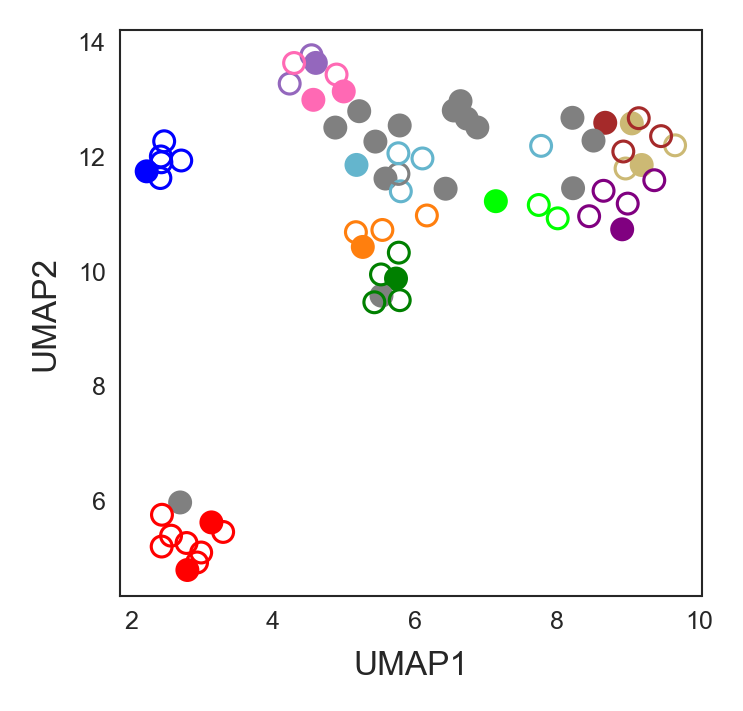

In [721]:
X=trans.transform(data)
# plot
fig = plt.figure(figsize=(2.5,2.5))
ax = fig.add_subplot(1,1,1)    
ax.scatter(X[:, 0], X[:, 1],ec=df_color_order["color"],fc=df_color_order["face_color"],s=25,lw=0.75)
ax.set_xlabel("UMAP1",fontsize=8)
ax.set_ylabel("UMAP2",fontsize=8)
ax.tick_params(labelsize=6)

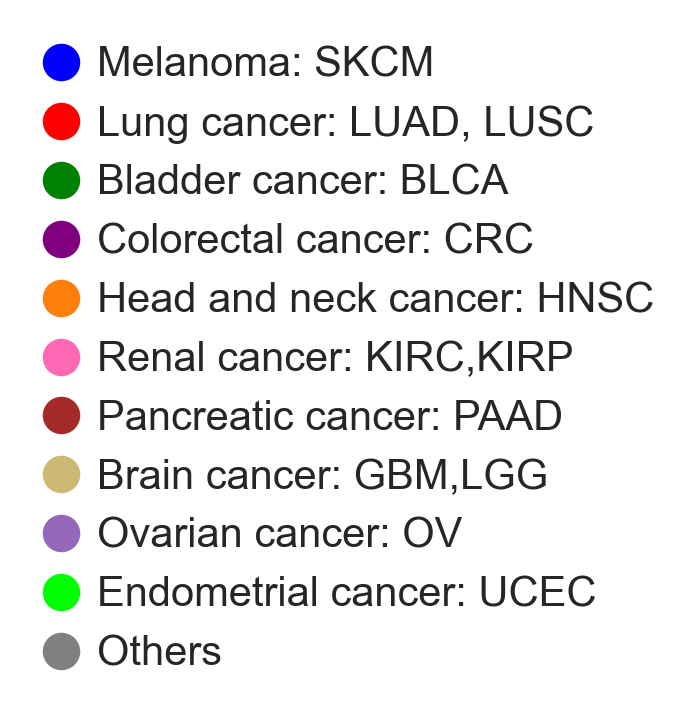

In [817]:
lg_labels=["Melanoma: SKCM","Lung cancer: LUAD, LUSC","Bladder cancer: BLCA","Colorectal cancer: CRC",
           "Head and neck cancer: HNSC","Renal cancer: KIRC,KIRP","Pancreatic cancer: PAAD","Brain cancer: GBM,LGG","Ovarian cancer: OV","Endometrial cancer: UCEC","Others"]
lg_colors=["blue","red","green","purple","tab:orange","hotpink","brown","y","tab:purple","lime","grey"]


from matplotlib.lines import Line2D
custom_legends =[ Line2D([0],[0],marker='o',markerfacecolor=lg_colors[i],markersize=10,# markeredgecolor="k",
                        label=lg_labels[i],
                        color="w"
                        ) for i in range(len(lg_labels)) ]


# plot
plt.figure(figsize=(1,1))
plt.legend(handles=custom_legends,loc="center",title="",fontsize=10,
           frameon=False,edgecolor="k", handlelength=0.7
           ,labelspacing=0.5,handletextpad=0.5) # h
plt.gca().set_axis_off()

# Concordance ratio

In [39]:
keynotes["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in keynotes["Details"]]
counter=Counter( keynotes["top_count"]).most_common()
counter

[(4, 261), (3, 38), (2, 12)]

<ipython-input-40-cfec80fe95ea>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


3.858520900321544


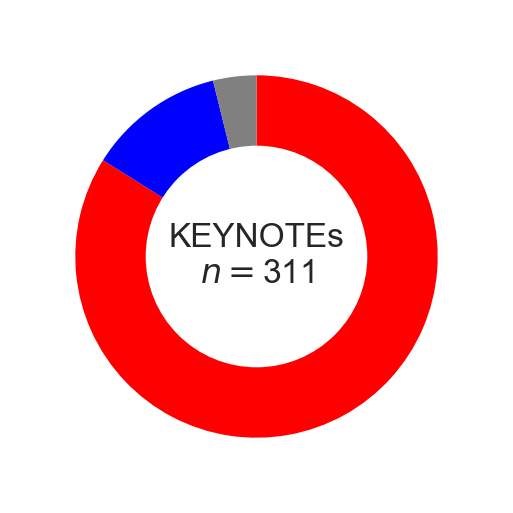

In [40]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3",""]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"KEYNOTEs\n$n=$"+str(len(keynotes)).format(len(keynotes)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

In [41]:
cptac["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in cptac["Details"] ]
counter=Counter( cptac["top_count"]).most_common()
counter

[(4, 953), (3, 94), (2, 44)]

4.032997250229148


<ipython-input-42-337229309880>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


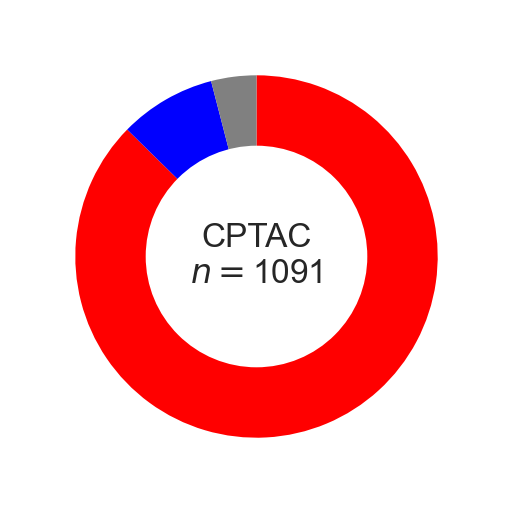

In [42]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"CPTAC\n$n=$"+str(len(cptac)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [43]:
nbdc["top_count"]=[ int( x.split(",")[0].split(":")[1]) for x in nbdc["Details"] ]
counter=Counter( nbdc["top_count"]).most_common()
counter

[(4, 335), (3, 68), (2, 10)]

2.4213075060532687


<ipython-input-44-c7c56b1e2853>:8: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


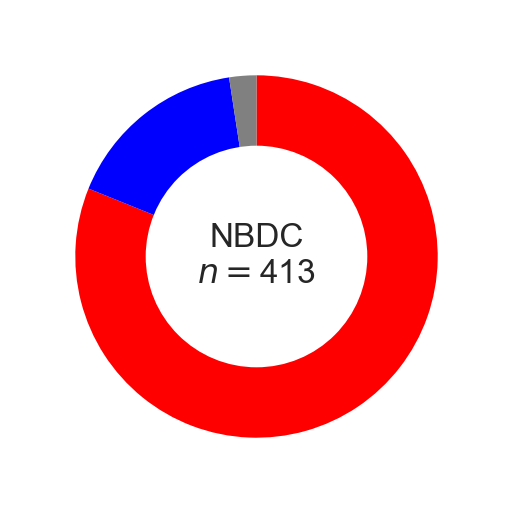

In [44]:
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"NBDC\n$n=$"+str(len(nbdc)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)
#ax.set_title("KEYTNOTEs",fontsize=10,backgroundcolor=dict_cluster_colors[name],color="w",fontweight="bold")
#plt.savefig(store+"pie_chart_8cluster_cancertype_0.png",dpi=300,bbox_inches="tight")

In [45]:
cbio_frozen_names=["blca_bgi",'brca_broad', 'brca_sanger','luad_broad', 'coadread_genentech',
'hnsc_broad','lgg_ucsf_2014','paad_icgc', 'paad_utsw_2015', ]

In [46]:
cbio_ffpe_names=['blca_cornell_2016','blca_dfarber_mskcc_2014',
        "ccrcc_dfci_2019", "coadread_dfci_2016","luad_mskcc_2015",
            "mel_dfci_2019",'mel_ucla_2016',
            'mixed_allen_2018_blca','mixed_allen_2018_mel','mixed_allen_2018_lung',
            "nsclc_mskcc_2018","skcm_dfci_2015"]

In [47]:
top_counts=[]
for name in cbio_ffpe_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)

In [48]:
Counter(top_counts)

Counter({4: 1304, 3: 75, 2: 32})

2.2678951098511693


<ipython-input-49-97bd46bab315>:9: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


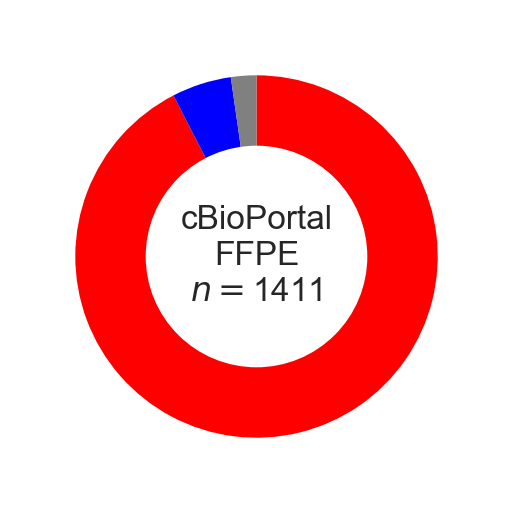

In [49]:
counter=Counter( top_counts).most_common()
# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFFPE\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

[(4, 775), (3, 73), (2, 27)]
3.085714285714286


<ipython-input-50-6de3819fa78b>:19: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  ax.pie(counts, labels=labels, colors=colors, autopct=None,


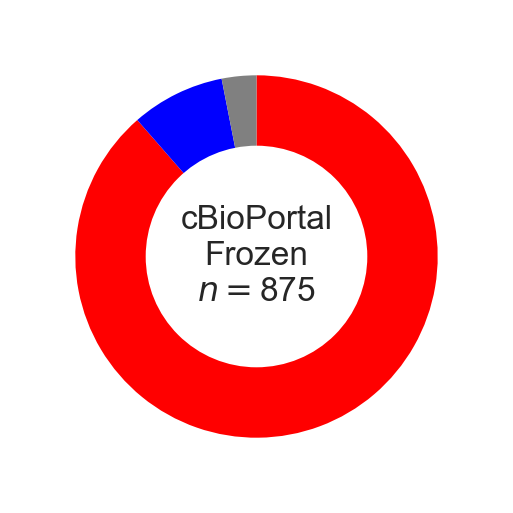

In [50]:
top_counts=[]
for name in cbio_frozen_names:
    path_to_file="../data/tgs_results/"+name+"_tgs.tsv"
    tmp_df=pd.read_csv(path_to_file,sep="\t")
    tmp_df.rename(columns={"Unnamed: 0":name},inplace=True)
    top_count=[ int( x.split(",")[0].split(":")[1]) for x in tmp_df["Details"] ]
    top_counts.extend(top_count)
    
counter=Counter( top_counts).most_common()
print(counter)

# pie chart
fig = plt.figure(figsize=(2,2))
labels=["Match 4","Match 3","Undeterminable"]
labels=["","",""]
ax = fig.add_subplot(111)
counts=[ x[1] for x in counter ]
colors=["red","blue","grey"]
ax.pie(counts, labels=labels, colors=colors, autopct=None,
                      pctdistance=0.6, shadow=False, labeldistance=1.15,
                      startangle=90, radius=None, counterclock=False,
                    center=(0, 0),
                      frame=False,  data=None,
          wedgeprops={'linewidth': 0, 'edgecolor':"white"},
          textprops={"size":8})

ax.text(0.5,0.5,"cBioPortal\nFrozen\n$n=$"+str(len(top_counts)),transform=ax.transAxes,fontsize=8,
           ha="center",va="center")
circle = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec='w')
ax.add_patch(circle)

print( counts[2]/np.sum(counts) *100)

# CPTAC

In [726]:
cptac.shape

(1091, 132)

In [730]:
apb_list=list(cptac.columns[cptac.columns.str.contains("APOBEC3.*_log")])

In [731]:
cg_list=["Smoking","sPOLE_mut","sMMR_mut"]

In [732]:
irs_list=["CD8A_log","GZMB_log","IFNG_log","PDCD1_log","CTLA4_log","CYT_log","GEP_score"]

In [733]:
cptac_cancer_orders=['LUSC', 'LUAD','HNC', 'UCEC', 'CRC', 'BRCA', 'HSOC', 'BRN',"PAAD", 'KRC']

In [734]:
counter_order=Counter(cptac["TGS"]).most_common()

In [492]:
for irs in irs_list:
    cptac.loc[:,irs+"_z"]=stats.zscore(cptac.loc[:,irs],nan_policy="omit")

In [735]:
for apb in apb_list:
    cptac.loc[:,apb+"_z"]=stats.zscore(cptac.loc[:,apb],nan_policy="omit")

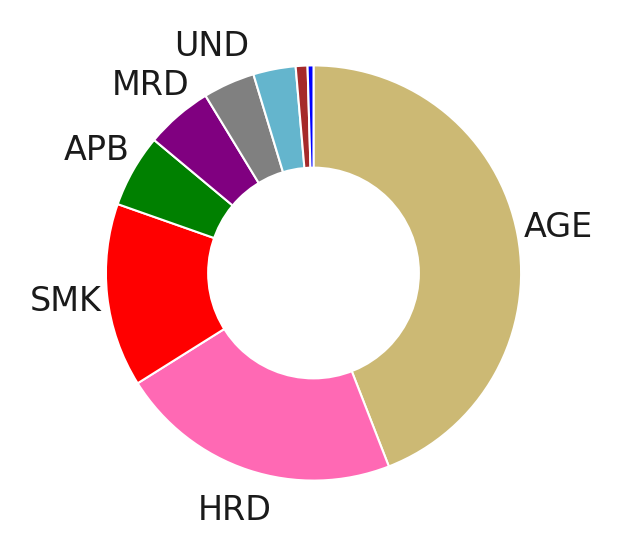

In [736]:
# Pie chart
counts=[x[1] for x in counter_order]
labels=[x[0] for x in counter_order]
colors=[dict_cluster_colors[x] for x in labels]
labels[-1]=""
labels[-2]=""
labels[-3]=""

plt.figure(figsize=(2,2))
plt.pie(x=counts,
       labels=labels, 
       colors=colors,
       wedgeprops={'linewidth': 0.5,'edgecolor':"white"},
       textprops={"fontsize":8,'color':"k","ha":"center","fontfamily":"Hervetica"},
       labeldistance=1.2,
       startangle=90,
       counterclock=False, 
       )

plt.axis('equal') 

center_circle = plt.Circle((0,0),0.5,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

In [737]:
table=pd.crosstab(cptac["CancerType2"],cptac["TGS"])
table.loc[:,cluster_orders2]

TGS,SMK,UVL,APB,POL,MRD,HRD,GNS,AGE,UND
CancerType2,,,,,,,,,
BRCA,0,0,18,0,2,39,7,56,4
BRN,0,1,0,0,1,7,1,87,2
CRC,1,0,0,1,23,7,0,70,3
HNC,13,4,32,0,1,14,1,33,10
HSOC,0,0,0,1,1,68,0,23,2
KRC,1,0,0,0,0,69,12,18,9
LUAD,56,0,6,0,0,11,6,26,4
LUSC,85,0,3,0,0,11,2,1,6
PAAD,0,0,2,0,2,9,5,112,2


In [796]:
table=table.rename(index={"BRN":"GBM","HNC":"HNSC","HSOC":"OV","KRC":"KIRC"})

In [800]:
labels

['LUSC', 'LUAD', 'HNSC', 'CRC', 'KIRC', 'BRCA', 'GBM', 'OV', 'PAAD', 'UCEC']

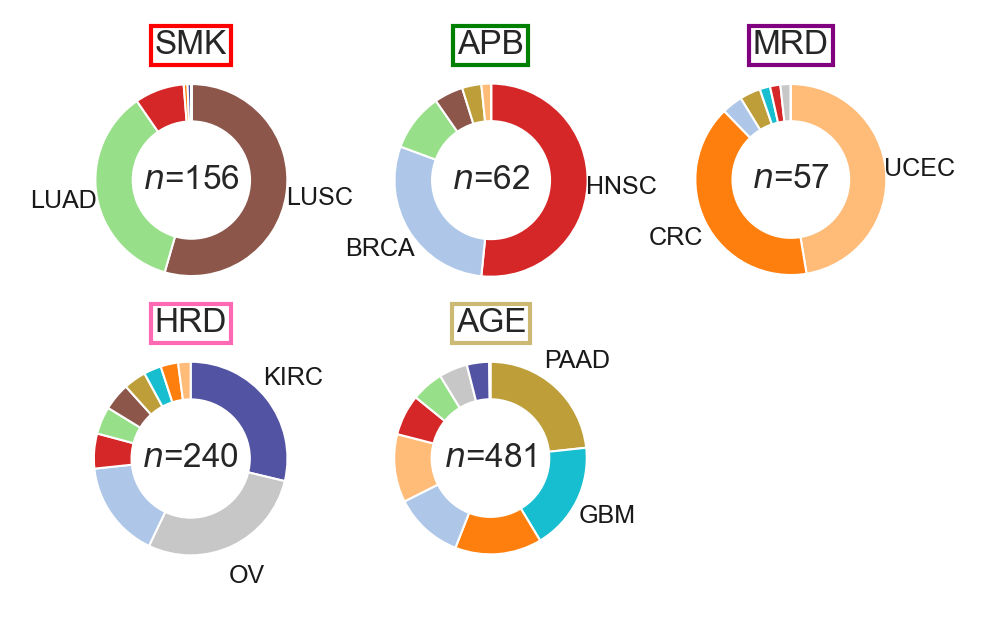

In [855]:
import matplotlib.patches as patches
fig=plt.figure(figsize=(3.5,2.25))
for i,subtype in enumerate(["SMK","APB","MRD","HRD","AGE"]):
    ax=fig.add_subplot(2,3,i+1)
    # Pie chart
    tmp=table.loc[:,subtype].sort_values(ascending=False)
    counts=list(tmp)
    labels=list(tmp.index)
    colors=[dict_cancer_colors[x] for x in labels]

    ax.pie(x=counts,
       labels=labels[:2]+[""]*(len(labels)-2),#labels, 
       colors=colors,
       wedgeprops={'linewidth': 0.5,'edgecolor':"white"},
       textprops={"fontsize":6,'color':"k","ha":"center","va":"center"},
       labeldistance=1.35,
       startangle=90,
       counterclock=False, 
       )

    ax.axis('equal') 
    
    c = patches.Circle(xy=(0, 0), radius=0.6, fc='w', ec="w",lw=1)
    ax.add_patch(c)
    
    n = np.sum(counts)
    ax.text(x=0,y=0,s="$n$="+str(int(n)),ha="center",va="center",fontsize=8)
    
    ax.set_title(subtype,size=8,ha="center",va="bottom",
                 bbox=dict(facecolor="w",edgecolor=dict_cluster_colors[subtype],
                          fill=True,linewidth=1,pad=1),pad=1)

fig.subplots_adjust(wspace=0.4)

In [738]:
cptac_c=cptac[cptac["TGS"].isin(["SMK","APB","MRD","HRD","AGE"])]

In [739]:
irs_list_z=[x+"_z" for x in irs_list]

In [497]:
cluster_orders_c=['SMK','APB','MRD', 'HRD', 'AGE']

In [498]:
# category1
selected_cat=["Smoking","sPOLE_mut","sMMR_mut"]
tmp_df=cptac_c[selected_cat]
selected_cat_dummies=pd.get_dummies( tmp_df)
selected_cat_dummies["TGS"]=cptac_c["TGS"]
category_sum=selected_cat_dummies.groupby("TGS").sum()
category_sum

,Smoking,sPOLE_mut,sMMR_mut
TGS,,,
AGE,79.0,0.0,3.0
APB,16.0,0.0,1.0
HRD,26.0,1.0,1.0
MRD,4.0,4.0,10.0
SMK,98.0,0.0,2.0


In [499]:
cptac_c["SMK"]=cptac_c["TGS"]=="SMK"

<ipython-input-499-773c76a0e461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cptac_c["SMK"]=cptac_c["TGS"]=="SMK"


In [500]:
from statsmodels.stats.proportion import proportion_confint
cptac["SMK"]=cptac["TGS"]=="SMK"

SMK,False,True
Smoking,,
0.0,386,47
1.0,154,98


Chisquare P= 4.65e-18
Fisher P= 1.89e-17
98/145
154/540


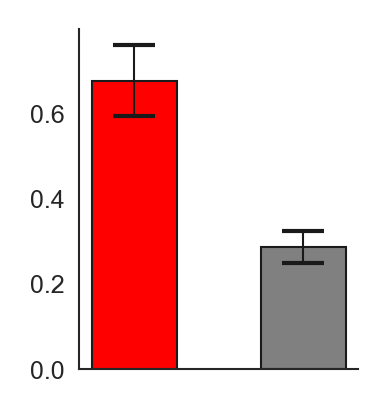

In [501]:
ct=pd.crosstab(cptac["Smoking"],cptac["SMK"])
display(ct)
p=stats.chi2_contingency(ct,correction=False)
print("Chisquare P= {:.2e}".format(p[1]) )
p=stats.fisher_exact(ct)
print("Fisher P= {:.2e}".format(p[1]) )

ct=ct[[1,0]]
ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=["red","grey"]
fig=plt.figure(figsize=(n*0.6,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,width=0.5,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels([])#labels, rotation=0, fontsize=8)
ax.legend([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

98/145
16/35
4/31
1/7
26/103
9/24
79/306
APB vs SMK P=1.60e-02


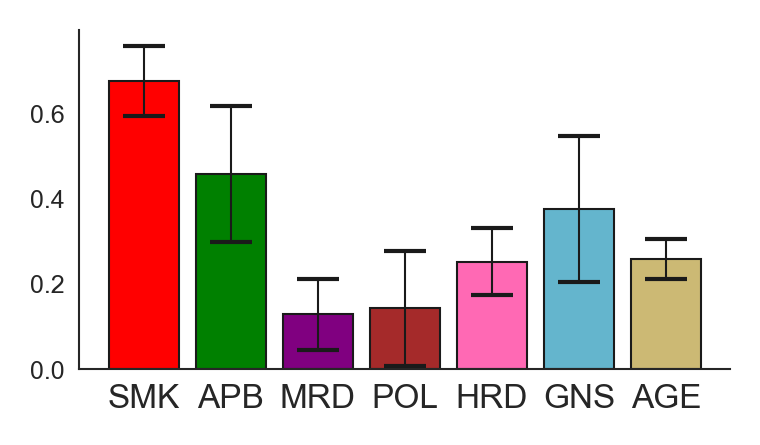

In [780]:
input_df=cptac.copy()
ct=pd.crosstab(input_df["Smoking"],input_df["TGS"])
ct=ct[["SMK","APB","MRD","POL","HRD","GNS","AGE"]]

ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=[dict_cluster_colors[cluster] for cluster in ct.columns]

fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels(labels, rotation=0, fontsize=8)
ax.legend([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ct2=ct.loc[:,["APB","SMK"]]
res=stats.chi2_contingency(ct2,correction=False)
print("APB vs SMK P={:.2e}".format(res[1]))

In [786]:
stats.chi2_contingency(ct.T)

(92.02376601293356,
 1.1504688507600117e-17,
 6,
 array([[ 93.10291859,  51.89708141],
        [ 22.47311828,  12.52688172],
        [ 19.9047619 ,  11.0952381 ],
        [  4.49462366,   2.50537634],
        [ 66.13517665,  36.86482335],
        [ 15.41013825,   8.58986175],
        [196.47926267, 109.52073733]]))

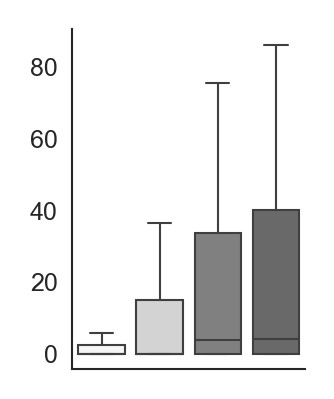

In [856]:
fig=plt.figure(figsize=(1.0,1.5))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
cat="Smoking_habit2"
val="Signature4_ratio"
order=["never","previous > 15y","previous <= 15y", "current",]
color=["whitesmoke","lightgrey","grey","dimgrey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=color)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend([])
ax.set_title("",fontsize=10)
ax.tick_params(axis="both",labelsize=8)

ax.set_xticklabels([])
#ax.set_title(cancer,fontsize=8)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [858]:
Counter(cptac["Smoking_habit2"])

Counter({'previous > 15y': 93,
         'previous <= 15y': 83,
         'never': 340,
         nan: 406,
         'current': 169})

In [859]:
cptac["Smoking3"]=cptac["Smoking_habit2"].replace({"current":"current or previous <= 15y",'previous <= 15y':"current or previous <= 15y"})

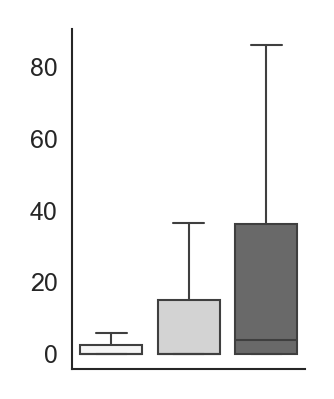

In [862]:
fig=plt.figure(figsize=(1.0,1.5))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
cat="Smoking3"
val="Signature4_ratio"
order=["never","previous > 15y", "current or previous <= 15y",]
color=["whitesmoke","lightgrey","dimgrey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=color)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend([])
ax.set_title("",fontsize=10)
ax.tick_params(axis="both",labelsize=8)

ax.set_xticklabels([])
#ax.set_title(cancer,fontsize=8)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

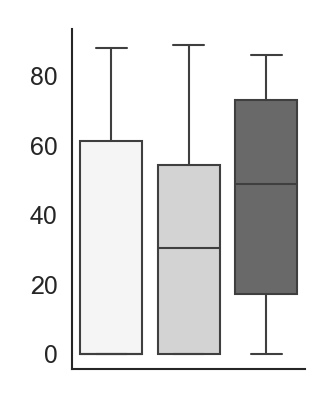

In [863]:
fig=plt.figure(figsize=(1.0,1.5))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
sns_df=sns_df[sns_df["CancerType2"]=="LUAD"]
cat="Smoking3"
val="Signature4_ratio"
order=["never","previous > 15y", "current or previous <= 15y",]
color=["whitesmoke","lightgrey","dimgrey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=color)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend([])
ax.set_title("",fontsize=10)
ax.tick_params(axis="both",labelsize=8)

ax.set_xticklabels([])
#ax.set_title(cancer,fontsize=8)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

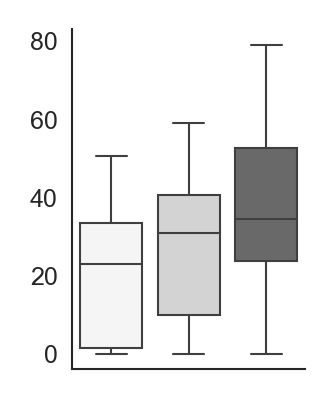

In [865]:
fig=plt.figure(figsize=(1.0,1.5))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
sns_df=sns_df[sns_df["CancerType2"]=="LUSC"]
cat="Smoking3"
val="Signature4_ratio"
order=["never","previous > 15y", "current or previous <= 15y",]
color=["whitesmoke","lightgrey","dimgrey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=color)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend([])
ax.set_title("",fontsize=10)
ax.tick_params(axis="both",labelsize=8)

ax.set_xticklabels([])
#ax.set_title(cancer,fontsize=8)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

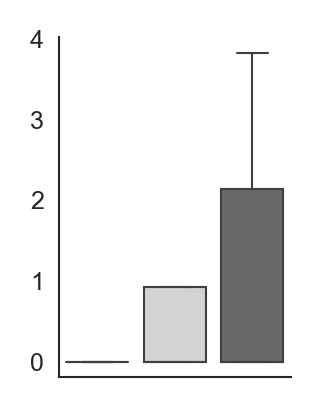

In [868]:
fig=plt.figure(figsize=(1.0,1.5))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
sns_df=sns_df[~sns_df["CancerType2"].isin(["LUAD","LUSC"])]
cat="Smoking3"
val="Signature4_ratio"
order=["never","previous > 15y", "current or previous <= 15y",]
color=["whitesmoke","lightgrey","dimgrey"]
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=color)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend([])
ax.set_title("",fontsize=10)
ax.tick_params(axis="both",labelsize=8)

ax.set_xticklabels([])
#ax.set_title(cancer,fontsize=8)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

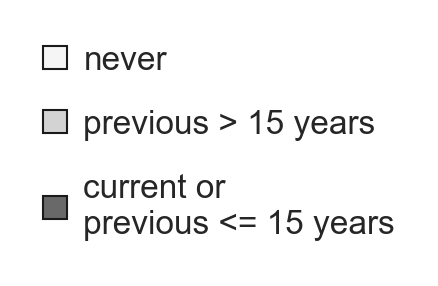

In [876]:
plt.figure(figsize=(1,1))
names=["never", "previous > 15 years", "current or\nprevious <= 15 years"]
colors=["whitesmoke","lightgrey","dimgrey"]
custom_legends =[  Patch(facecolor=colors[i],edgecolor="k",linewidth=0.5,
   			label=names[i]) for i in range(3) ]
plt.legend(handles=custom_legends,loc="center",fontsize=8,ncol=1,handlelength=0.7,labelspacing=1,handletextpad=0.5 )
plt.gca().set_axis_off()
#plt.savefig(store+"patch_smoking_status.png",dpi=300,bbox_inches="tight")

In [885]:
cptac["Smoking3_order"]=cptac["Smoking3"].replace({"never":1,"previous > 15y":2, "current or previous <= 15y":3})

lungs=[]
for idx in cptac.index:
    if cptac.loc[idx,"CancerType2"]=="LUSC":
        lungs.append("LUSC")
    elif cptac.loc[idx,"CancerType2"]=="LUAD":
        lungs.append("LUAD")
    else:
        lungs.append("non-lung cancer")
cptac["CancerType_lung"]=lungs

In [886]:
cptac[["CancerType_lung","Signature4_ratio","Smoking3_order"]].to_csv("../analysis_in_R/CPTAC_smoking.tsv",sep="\t",index=False)

In [743]:
cptac["APB"]=cptac["TGS"]=="APB"

APB,False,True
sPIK3CA_mut,,
0.0,878,49
1.0,84,13


Chisquare P= 1.43e-03
Fisher P= 5.31e-03
13/62
84/962


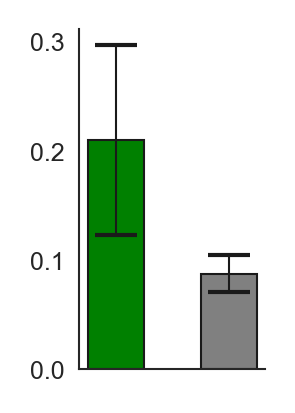

In [751]:
input_df=cptac[ ~cptac["TGS"].isin(["POL","MRD"]) ]
ct=pd.crosstab(input_df["sPIK3CA_mut"],input_df["APB"])

display(ct)
p=stats.chi2_contingency(ct,correction=False)
print("Chisquare P= {:.2e}".format(p[1]) )
p=stats.fisher_exact(ct)
print("Fisher P= {:.2e}".format(p[1]) )

ct=ct[[1,0]]
ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=["green","grey"]
fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,width=0.5,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels([])#labels, rotation=0, fontsize=8)
ax.legend([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

(1024, 140)
MannwhitneyuResult(statistic=17736.5, pvalue=4.297511657175602e-08)


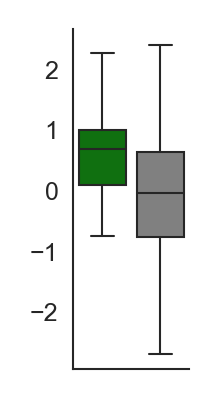

In [748]:
fig=plt.figure(figsize=(0.5,1.5))
ax=fig.add_subplot(111)

sns_df=cptac[ ~cptac["TGS"].isin(["POL","MRD"]) ]
print(sns_df.shape)
cat="APB"
val="HALLMARK_PI3K_AKT_MTOR_SIGNALING"
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",boxprops={"alpha":1},palette=["green","grey"],
              order=[1,0])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_title("",fontsize=10)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

a=sns_df[sns_df[cat]==1][val]
b=sns_df[sns_df[cat]==0][val]
print(stats.mannwhitneyu(a,b))

(1024, 140)
MannwhitneyuResult(statistic=14035.0, pvalue=1.3349265317737015e-12)


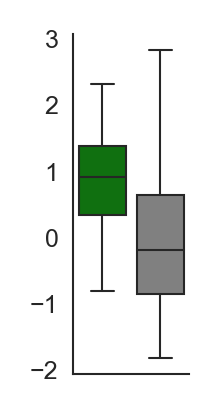

In [749]:
fig=plt.figure(figsize=(0.5,1.5))
ax=fig.add_subplot(111)

sns_df=cptac[ ~cptac["TGS"].isin(["POL","MRD"]) ]
print(sns_df.shape)
cat="APB"
val="APOBEC3B_log_z"
ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",boxprops={"alpha":1},palette=["green","grey"],
              order=[1,0])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_title("",fontsize=10)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

a=sns_df[sns_df[cat]==1][val]
b=sns_df[sns_df[cat]==0][val]
print(stats.mannwhitneyu(a,b))

P= 5.91e-12


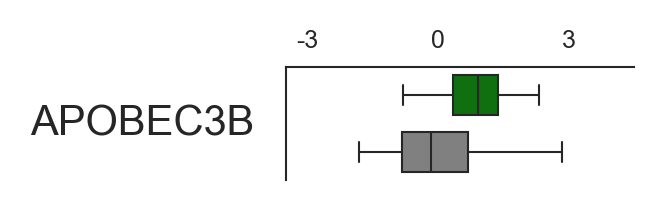

In [757]:
fig=plt.figure(figsize=(1.5,0.5))
vals=[x+"_z" for x in apb_list]
vals=["APOBEC3B_log_z"]#,"HALLMARK_PI3K_AKT_MTOR_SIGNALING"]
for i,val in enumerate(vals):
    ax=fig.add_subplot(len(vals),1,i+1)
    data=cptac
    ax=sns.boxplot(x=val,y="APB",data=data,palette=["green","grey"],sym="",order=[1,0],orient="h",width=0.7)
    ax.set_ylabel(val.replace("_log_z",""),fontsize=10,rotation=0,ha="right",va="center")
    ax.set_xlim(-3.5,4.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
    if i ==0 :
        ax.set_xticks([-3,0,3])
        ax.set_xticklabels([-3,0,3])
        ax.xaxis.tick_top()
    else:
        ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.tick_params(labelsize=6)

    
    a=data[data["APB"]==0][val].values
    b=data[data["APB"]==1][val].values
    s,pb=stats.mstats.brunnermunzel(a,b)
    s,pm=stats.mstats.mannwhitneyu(a,b)
    #print("P= {:.2e}".format(pb))
    print("P= {:.2e}".format(pm))
    
plt.subplots_adjust(hspace=0.1)
plt.show()

P= 7.14e-07


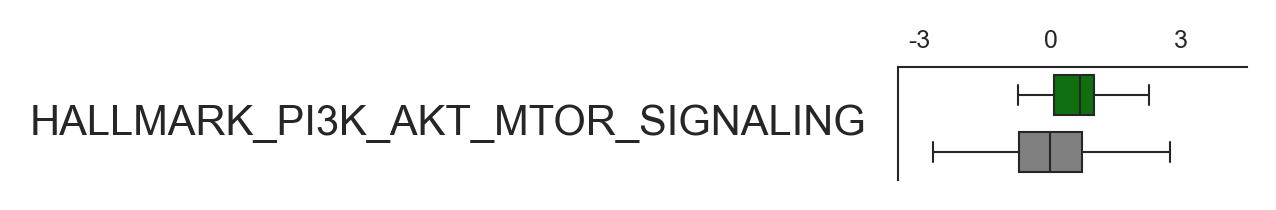

In [756]:
fig=plt.figure(figsize=(1.5,0.5))
vals=[x+"_z" for x in apb_list]
vals=["HALLMARK_PI3K_AKT_MTOR_SIGNALING"]
for i,val in enumerate(vals):
    ax=fig.add_subplot(len(vals),1,i+1)
    data=cptac
    ax=sns.boxplot(x=val,y="APB",data=data,palette=["green","grey"],sym="",order=[1,0],orient="h",width=0.7)
    ax.set_ylabel(val.replace("_log_z",""),fontsize=10,rotation=0,ha="right",va="center")
    ax.set_xlim(-3.5,4.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
    if i ==0 :
        ax.set_xticks([-3,0,3])
        ax.set_xticklabels([-3,0,3])
        ax.xaxis.tick_top()
    else:
        ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    ax.tick_params(labelsize=6)

    
    a=data[data["APB"]==0][val].values
    b=data[data["APB"]==1][val].values
    s,pb=stats.mstats.brunnermunzel(a,b)
    s,pm=stats.mstats.mannwhitneyu(a,b)
    #print("P= {:.2e}".format(pb))
    print("P= {:.2e}".format(pm))
    
plt.subplots_adjust(hspace=0.1)
plt.show()

9/156
13/62
18/57
9/10
10/240
1/36
61/481
APB vs AGE P=7.35e-02


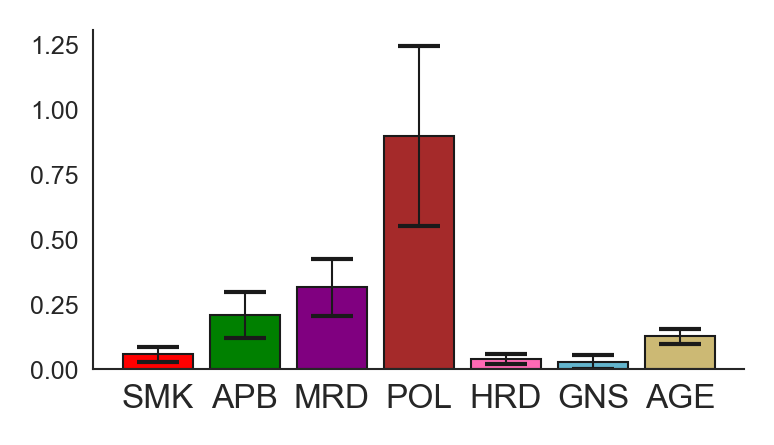

In [787]:
input_df=cptac.copy()
ct=pd.crosstab(input_df["sPIK3CA_mut"],input_df["TGS"])
ct=ct[["SMK","APB","MRD","POL","HRD","GNS","AGE"]]

ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=[dict_cluster_colors[cluster] for cluster in ct.columns]

fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels(labels, rotation=0, fontsize=8)
ax.legend([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ct2=ct.loc[:,["APB","AGE"]]
res=stats.chi2_contingency(ct2,correction=False)
print("APB vs AGE P={:.2e}".format(res[1]))

9/156
13/62
10/240
61/481
APB vs AGE P=7.35e-02


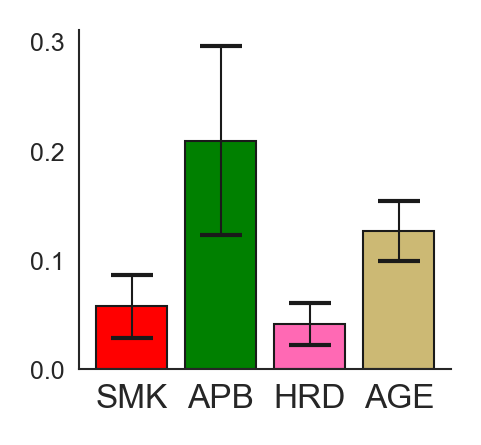

In [788]:
input_df=cptac.copy()
ct=pd.crosstab(input_df["sPIK3CA_mut"],input_df["TGS"])
ct=ct[["SMK","APB","HRD","AGE"]]

ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=[dict_cluster_colors[cluster] for cluster in ct.columns]

fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels(labels, rotation=0, fontsize=8)
ax.legend([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ct2=ct.loc[:,["APB","AGE"]]
res=stats.chi2_contingency(ct2,correction=False)
print("APB vs AGE P={:.2e}".format(res[1]))

In [790]:
stats.chi2_contingency(ct)

(24.506908408994008,
 1.957592257869859e-05,
 3,
 array([[140.54952077,  55.85942492, 216.23003195, 433.36102236],
        [ 15.45047923,   6.14057508,  23.76996805,  47.63897764]]))

0/156
0/62
4/57
10/10
1/240
0/36
0/481


ValueError: The internally computed table of expected frequencies has a zero element at (1, 0).

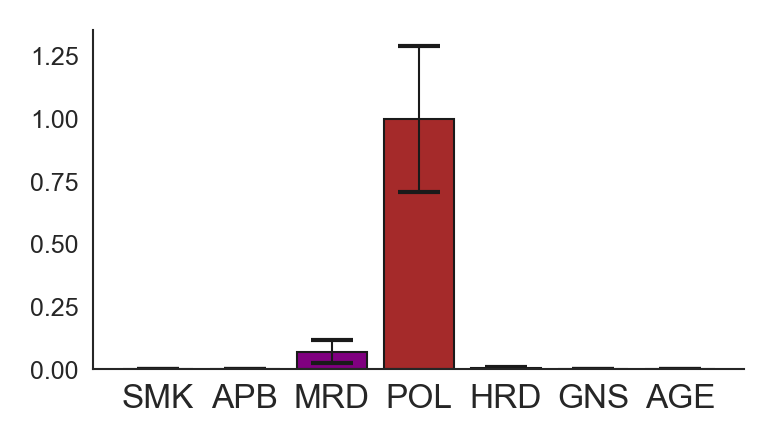

In [772]:
input_df=cptac.copy()
ct=pd.crosstab(input_df["sPOLE_mut"],input_df["TGS"])
ct=ct[["SMK","APB","MRD","POL","HRD","GNS","AGE"]]

ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=[dict_cluster_colors[cluster] for cluster in ct.columns]

fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels(labels, rotation=0, fontsize=8)
ax.legend([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ct2=ct.loc[:,["APB","AGE"]]
res=stats.chi2_contingency(ct2,correction=False)
print("APB vs AGE P={:.2e}".format(res[1]))

In [ ]:
input_df=cptac.copy()
ct=pd.crosstab(input_df["sMMR_mut"],input_df["TGS"])
ct=ct[["SMK","APB","MRD","POL","HRD","GNS","AGE"]]

ratios,errors,labels=[],[],[]
for col in ct.columns:
    count=ct.loc[1,col]
    nobs=np.sum( ct.loc[:,col])
    ratio=count/nobs
    cil,cih=proportion_confint(count,nobs,method="binom_test",alpha=0.05)    
    ratios.append(ratio)
    errors.append(np.array(cil-ratio, cih-ratio))
    labels.append(col)
    print(str(count)+"/"+str(nobs))

n=len(ratios)
left=range(n)
colors=[dict_cluster_colors[cluster] for cluster in ct.columns]

fig=plt.figure(figsize=(n*0.4,1.5))
ax=fig.add_subplot(111)
ax.bar(x=left,height=ratios,yerr=errors,
       tick_label=labels,color=colors,capsize=5,edgecolor="k",linewidth=0.5)
ax.tick_params(labelsize=6)  
ax.set_xticklabels(labels, rotation=0, fontsize=8)
ax.legend([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ct2=ct.loc[:,["APB","AGE"]]
res=stats.chi2_contingency(ct2,correction=False)
print("APB vs AGE P={:.2e}".format(res[1]))

In [506]:
plt_df=cptac_c.copy()
mean_by_cluster=plt_df[irs_list_z+["TGS"]].groupby("TGS").mean().T
mean_by_cluster=mean_by_cluster.loc[:,cluster_orders_c]
mean_by_cluster

TGS,SMK,APB,MRD,HRD,AGE
CD8A_log_z,0.209805,0.389646,0.426178,0.154668,-0.309713
GZMB_log_z,0.543069,0.577133,0.651830,-0.039094,-0.344121
IFNG_log_z,0.486861,0.538072,0.682930,-0.038243,-0.361747
PDCD1_log_z,0.345919,0.459599,0.356361,0.007118,-0.277168
CTLA4_log_z,0.533065,0.719235,0.296354,-0.190441,-0.265021
CYT_log_z,0.325319,0.389543,0.493939,0.081898,-0.346949
GEP_score_z,0.268390,0.610039,0.387710,0.122648,-0.346505


In [507]:
mean_by_cluster_raw=cptac_c[irs_list+["TGS"]].groupby("TGS").mean().T
mean_by_cluster_raw=mean_by_cluster_raw.loc[:,cluster_orders_c]
mean_by_cluster_raw

TGS,SMK,APB,MRD,HRD,AGE
CD8A_log,2.030197,2.177248,2.207119,1.985114,1.605404
GZMB_log,2.697858,2.733755,2.812471,2.084366,1.762924
IFNG_log,1.225245,1.261135,1.362654,0.857240,0.630522
PDCD1_log,1.382933,1.452426,1.389316,1.175825,1.002042
CTLA4_log,2.213840,2.372648,2.011919,1.596670,1.533052
CYT_log,2.726441,2.780449,2.868237,2.521744,2.161119
GEP_score,56.832519,60.442790,58.093404,55.292446,50.334813


CD8A_log_z
GZMB_log_z
IFNG_log_z
PDCD1_log_z
CTLA4_log_z
CYT_log_z
GEP_score_z


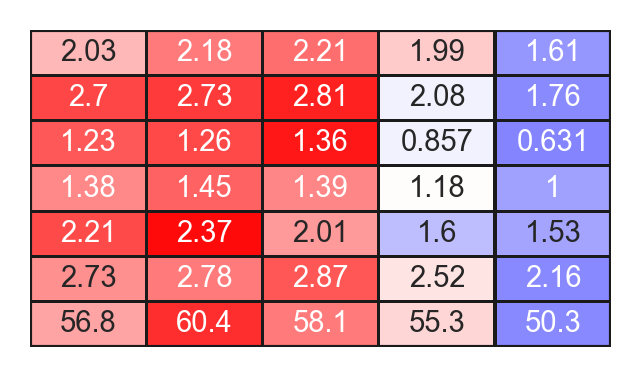

In [508]:
sns_df=mean_by_cluster
annot_df=mean_by_cluster_raw
nrow=sns_df.shape[0]
fig=plt.figure(figsize=(2.5,nrow*0.2))
ax=fig.add_subplot(111)
ylabels=sns_df.index
sns.heatmap(sns_df, vmax=0.75,vmin=-0.75,
           annot=annot_df,
          annot_kws={"fontsize":7},
           cmap=bwr
           ,xticklabels=0,yticklabels=0
           ,linewidths=0.5, linecolor='k'
           ,cbar=False,fmt=".3g"
           )
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=sns_df.shape[1], color='k',linewidth=1)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=sns_df.shape[0], color='k',linewidth=1)
ax.set_xlabel("")
for i in sns_df.index:
    print(i)

([], [])

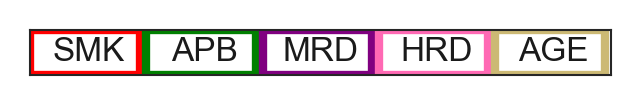

In [509]:
n=5
names=cluster_orders_c
colors=[dict_cluster_colors[x] for x in names]


fig = plt.figure(figsize=(2.5,0.2))
ax = fig.add_subplot(111)
for i,color in enumerate(colors):
    r=patches.Rectangle(xy=(i/n,0),width=1/(n+0.3),height=1,edgecolor=color,facecolor="w",lw=2)
    ax.add_patch(r)
    text=names[i]
    ax.text(x=(i+0.5)/n,y=0.5,s=text,fontsize=8, ha="center",va="center", color="k")

plt.xticks([])
plt.yticks([])
#plt.savefig(store+"table_labels.png",dpi=300,bbox_inches="tight")

APB vs SMK P= 9.46e-04


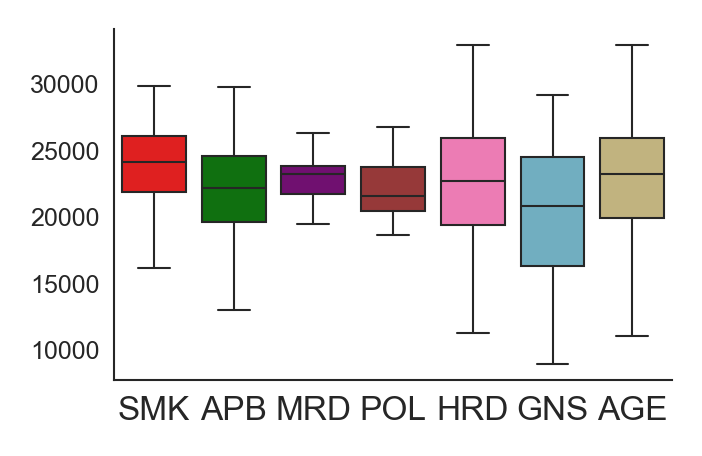

In [791]:
fig=plt.figure(figsize=(2.4,1.55))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
cat="TGS"
val="age_at_diagnosis"
order=["SMK","APB","MRD","POL","HRD","GNS","AGE"]
colors=[dict_cluster_colors[cluster] for cluster in order]

ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=colors)#
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("",fontsize=10)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(order, rotation=0, fontsize=8)

a=sns_df[sns_df[cat]=="SMK"][val].values
b=sns_df[sns_df[cat]=="APB"][val].values

s,pb=stats.mstats.brunnermunzel(a,b)
s,pm=stats.mstats.mannwhitneyu(a,b)
print("APB vs SMK P= {:.2e}".format(pm))

APB vs SMK P= 1.71e-09


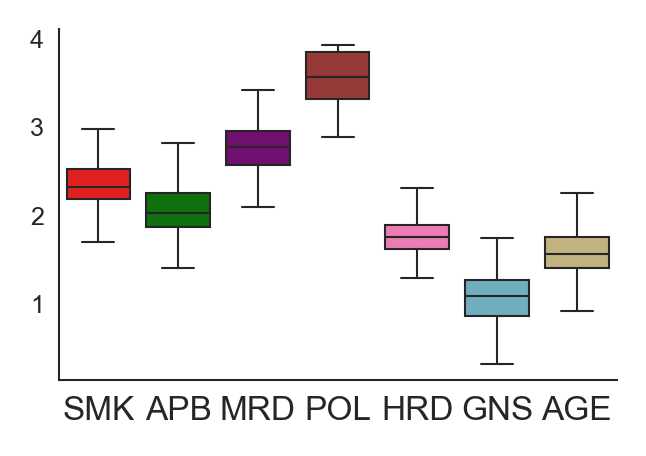

In [778]:
fig=plt.figure(figsize=(2.4,1.55))
ax=fig.add_subplot(111)
sns_df=cptac.copy()
sns_df["TMB_log10"]=np.log10(sns_df["Missense_Mutation"]+1)
cat="TGS"
val="TMB_log10"
order=["SMK","APB","MRD","POL","HRD","GNS","AGE"]
colors=[dict_cluster_colors[cluster] for cluster in order]

ax=sns.boxplot(x=cat,y=val,data=sns_df,sym="",order=order,palette=colors)#
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("",fontsize=10)
ax.legend([])
ax.tick_params(axis="both",labelsize=6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(order, rotation=0, fontsize=8)

a=sns_df[sns_df[cat]=="SMK"][val].values
b=sns_df[sns_df[cat]=="APB"][val].values

s,pb=stats.mstats.brunnermunzel(a,b)
s,pm=stats.mstats.mannwhitneyu(a,b)
print("APB vs SMK P= {:.2e}".format(pm))